## Business Case:

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.
ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

### Machine Learning as way to improve ITSM processes

1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the       problem before it surfaces.

2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources     and technology planning.

3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets

### The kernal is based on my solution that i have come up with. 

Step 1 - Importing necessary packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine
import pandas_profiling as pp

Step 2 - Reading Data from SQL Table

In [6]:
da = pd.read_sql('show databases',engine)

In [7]:
da

,Database
0,information_schema
1,project_itsm


In [9]:
engine1.table_names()

['dataset_list']

In [10]:
data = pd.read_sql_table('dataset_list',engine1)

Step 3 - Saving the data as CSV file and loading it again into Pandas 

In [11]:
#data.to_csv('D:/final-project/dataset.csv')

In [52]:
#data=pd.read_csv('D:/final-project/itsm/dataset.csv')
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


Step 4 - Doing Basic Exploration to get info on the Data

In [53]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [54]:
data.shape

(46606, 25)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
CI_Name                       46606 non-null object
CI_Cat                        46606 non-null object
CI_Subcat                     46606 non-null object
WBS                           46606 non-null object
Incident_ID                   46606 non-null object
Status                        46606 non-null object
Impact                        46606 non-null object
Urgency                       46606 non-null object
Priority                      46606 non-null object
number_cnt                    46606 non-null object
Category                      46606 non-null object
KB_number                     46606 non-null object
Alert_Status                  46606 non-null object
No_of_Reassignments           46606 non-null object
Open_Time                     46606 non-null object
Reopen_Time                   46606 non-null object
Resolved_Time                 46606 non-null object
Close_T

In [56]:
data.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0042400,Closed,4,4,4,0.371073953,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [57]:
pp.ProfileReport(data)

C:\Users\MANGA\Anaconda3\lib\site-packages\pandas_profiling\model\base.py:173: UserWarning:

Column "Close_Time" appears to be containing only date/datetime values. You might consider changing the type to datetime (pd.to_datetime())

C:\Users\MANGA\Anaconda3\lib\site-packages\pandas_profiling\model\base.py:173: UserWarning:

Column "Open_Time" appears to be containing only date/datetime values. You might consider changing the type to datetime (pd.to_datetime())



Step 5 - Starting the preprocessing and Cleaning of Data  

-Below Steps are intutive approach for finding out the solution.

In [12]:
# droping the columns which is not required

data.drop(labels='Alert_Status',axis=1,inplace=True)

In [13]:
# Finding out the counts of high and low Priority Tickets where 1 is high and 5 is lowest

from collections import Counter as c

print(c(data.Impact).most_common())
print(c(data.Urgency).most_common())
print(c(data.Priority).most_common())

[('4', 22556), ('5', 16741), ('3', 5234), ('NS', 1380), ('2', 692), ('1', 3)]
[('4', 22588), ('5', 16779), ('3', 6536), ('2', 696), ('1', 6), ('5 - Very Low', 1)]
[('4', 22717), ('5', 16486), ('3', 5323), ('NA', 1380), ('2', 697), ('1', 3)]


In [14]:
# Treating the object type values separately

iup = data.loc[:,['Impact','Urgency','Priority']]

In [15]:
iup.head()

,Impact,Urgency,Priority
0,4,4,4
1,3,3,3
2,NS,3,NA
3,4,4,4
4,4,4,4


In [16]:
iup.Urgency.unique()

array(['4', '3', '5', '2', '1', '5 - Very Low'], dtype=object)

In [17]:
iup.Impact.replace(to_replace='NS',value=np.nan,inplace=True)
iup.Priority.replace(to_replace='NA',value=np.nan,inplace=True)
iup.Urgency.replace(to_replace='5 - Very Low',value='5',inplace=True)
#iup.drop(index='NS',inplace=True)
#iup.drop(index='5 - Very Low',inplace=True)

In [18]:
iup.isnull().sum()

Impact      1380
Urgency        0
Priority    1380
dtype: int64

In [19]:
iup.fillna(value='0',inplace=True)

In [20]:
iup.head()

,Impact,Urgency,Priority
0,4,4,4
1,3,3,3
2,0,3,0
3,4,4,4
4,4,4,4


In [21]:
iup=iup.astype('float')

In [22]:
# Checking The Correlation of of the Target Varible

iup.corr()

,Impact,Urgency,Priority
Impact,1.000000,0.856382,0.995996
Urgency,0.856382,1.000000,0.863380
Priority,0.995996,0.863380,1.000000


In [23]:
data2 = data[data['Priority']=='2']

In [24]:
data2.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
849,WSR000008,computer,Windows Server,WBS000102,IM0000944,Closed,2,2,2,0.79844416,...,,01-10-2013 18:20,01-10-2013 18:23,"2,43,70,27,778",User error,1,SD0001198,,1,C00000517
1126,WBA000124,application,Web Based Application,WBS000088,IM0001225,Closed,2,2,2,0.509362946,...,,,01-10-2013 15:34,"7,27,05,55,556",Other,1,SD0001639,,,
1128,OVR000033,,,WBS000118,IM0001227,Closed,2,2,2,0.647833302,...,,,01-10-2013 09:14,"0,807777778",Operator error,1,SD0001642,,1,C00001549
1129,WBA000124,application,Web Based Application,WBS000088,IM0001228,Closed,2,2,2,0.734261312,...,,,01-10-2013 15:34,"7,11,27,77,778",Other,1,SD0001641,,,
1185,CBD000911,computer,Banking Device,WBS000146,IM0001285,Closed,2,2,2,0.570666899,...,01-10-2013 12:56,01-10-2013 12:57,01-10-2013 12:57,"2,77,52,77,778",Other,1,SD0001738,,,


In [25]:
col = list(data2.columns)
print(col)

['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions', 'Related_Interaction', 'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change']


In [26]:
# Finding the important features based on Columns

for i in col:
    print(i)
    print('----------------')
    print(c(data2[i]).most_common(5))
    print()

CI_Name
----------------
[('WBA000124', 21), ('SUB000508', 15), ('SBA000773', 14), ('DTA000025', 11), ('SUB000113', 10)]

CI_Cat
----------------
[('computer', 425), ('application', 194), ('subapplication', 33), ('networkcomponents', 22), ('', 8)]

CI_Subcat
----------------
[('Banking Device', 412), ('Server Based Application', 95), ('Web Based Application', 83), ('Desktop Application', 36), ('Windows Server', 11)]

WBS
----------------
[('WBS000146', 412), ('WBS000162', 24), ('WBS000088', 21), ('WBS000073', 17), ('WBS000285', 16)]

Incident_ID
----------------
[('IM0000944', 1), ('IM0001225', 1), ('IM0001227', 1), ('IM0001228', 1), ('IM0001285', 1)]

Status
----------------
[('Closed', 694), ('Work in progress', 3)]

Impact
----------------
[('2', 692), ('3', 5)]

Urgency
----------------
[('2', 692), ('3', 3), ('1', 2)]

Priority
----------------
[('2', 697)]

number_cnt
----------------
[('0.79844416', 1), ('0.509362946', 1), ('0.647833302', 1), ('0.734261312', 1), ('0.570666899', 

In [27]:
# Below Feature should be used as feature for modeling

pri_col=['CI_Cat','CI_Subcat','WBS','KB_number','Closure_Code']

In [28]:
data3 = data[data['Priority']=='3']

In [29]:
for i in col:
    print(i)
    print('----------------')
    print(c(data3[i]).most_common(5))
    print()

CI_Name
----------------
[('SBA000017', 386), ('SBA000805', 358), ('DTA000616', 212), ('SBA000131', 209), ('SBA000427', 205)]

CI_Cat
----------------
[('application', 4017), ('computer', 372), ('subapplication', 239), ('storage', 188), ('database', 144)]

CI_Subcat
----------------
[('Server Based Application', 2873), ('Web Based Application', 622), ('Desktop Application', 620), ('Banking Device', 187), ('Database', 144)]

WBS
----------------
[('WBS000099', 405), ('WBS000016', 378), ('WBS000199', 308), ('WBS000091', 229), ('WBS000073', 227)]

Incident_ID
----------------
[('IM0000005', 1), ('IM0000023', 1), ('IM0000033', 1), ('IM0000064', 1), ('IM0000074', 1)]

Status
----------------
[('Closed', 5321), ('Work in progress', 2)]

Impact
----------------
[('3', 5221), ('4', 100), ('5', 2)]

Urgency
----------------
[('3', 5174), ('4', 144), ('2', 4), ('1', 1)]

Priority
----------------
[('3', 5323)]

number_cnt
----------------
[('0.415049969', 1), ('0.025310167', 1), ('0.860254961', 

Step 6 - Starting the modeling of data based on features

In [30]:
# import basic packages for modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
ttdata= data.loc[:,['CI_Cat','CI_Subcat','WBS','KB_number','Priority']]
ttdata.head()

,CI_Cat,CI_Subcat,WBS,KB_number,Priority
0,subapplication,Web Based Application,WBS000162,KM0000553,4
1,application,Web Based Application,WBS000088,KM0000611,3
2,application,Desktop Application,WBS000092,KM0000339,NA
3,application,Web Based Application,WBS000088,KM0000611,4
4,application,Web Based Application,WBS000088,KM0000611,4


In [32]:
enc = LabelEncoder()
ttdata.CI_Cat =enc.fit_transform(ttdata.CI_Cat)
ttdata.CI_Subcat =enc.fit_transform(ttdata.CI_Subcat)
ttdata.WBS =enc.fit_transform(ttdata.WBS)
ttdata.KB_number =enc.fit_transform(ttdata.KB_number)
ttdata.Priority = iup.Priority

In [33]:
#ttdata2 = ttdata[ttdata.Priority==2]
ttdata.head()

,CI_Cat,CI_Subcat,WBS,KB_number,Priority
0,12,58,137,413,4.0
1,2,58,70,456,3.0
2,2,11,74,244,0.0
3,2,58,70,456,4.0
4,2,58,70,456,4.0


In [34]:
X_train,X_test,y_train,y_test=train_test_split(ttdata.iloc[:,:-1],ttdata.iloc[:,-1],test_size=0.3,random_state=10)

## Fiting the Data into the model and got an accuracy

In [35]:
model = RandomForestClassifier(n_estimators=150).fit(X_train,y_train)
ypred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

## Model accuracy Score 

In [40]:
accuracy_score(y_test,ypred)

0.8858532398798455

In [41]:
from xgboost import XGBClassifier

In [42]:
model2 = XGBClassifier(max_depth=5,n_estimators=500).fit(X_train,y_train)
y2pred = model2.predict(X_test)

In [43]:
accuracy_score(y_test,y2pred)

0.8827063367186383

### Checking the missclassification of the prediction data 

In [44]:
pd.crosstab(y_test,y2pred)

col_0,0.0,2.0,3.0,4.0,5.0
Priority,,,,,
0.0,6,6,327,66,20
1.0,0,0,0,1,0
2.0,0,151,15,27,17
3.0,23,31,1196,240,91
4.0,0,54,89,6522,164
5.0,4,6,56,403,4467


In [45]:
c(y_test)

Counter({5.0: 4936, 0.0: 425, 3.0: 1581, 4.0: 6829, 2.0: 210, 1.0: 1})

Original accuracy

In [46]:
151/210

0.719047619047619

### At this point we have already predicted the the high priority tickets which complete objective 1 and 3
### Now going for predicting the resource allocation which is objective 2

#### Step 1-  Starting the preprocessing of Data

In [47]:
import re

In [48]:
date = list(data.Open_Time)

In [49]:
date[1]
newdate = []

In [50]:
for i in range(len(date)):
    lis=re.split('\s',date[i])
    newdate.append(lis[0])

In [51]:
dat = {'newdate':newdate}
new_date = pd.DataFrame(data=dat)

In [52]:
new_date.head()

,newdate
0,05-02-2012
1,12-03-2012
2,29-03-2012
3,17-07-2012
4,10-08-2012


In [56]:
new_date['incident']=data.Incident_ID


In [57]:
new_date['week']=pd.DatetimeIndex(new_date['newdate'],dayfirst=True).week
new_date['months'] = pd.DatetimeIndex(new_date['newdate'],dayfirst=True).month
new_date['year']=pd.DatetimeIndex(new_date['newdate'],dayfirst=True).year

In [58]:
new_date.index=pd.to_datetime(new_date.newdate,dayfirst=True)

In [59]:
cou=list(c(new_date.newdate).most_common())

In [60]:
cou1 = []
cou2 = []

In [61]:
for i in range(len(cou)):
    cou1.append(cou[i][1])
    cou2.append(cou[i][0])

In [62]:
new_date['date']=new_date.newdate

In [63]:
cou1[0]

569

In [64]:
for i in range(len(cou2)):
    new_date.loc[new_date['date']==cou2[i],'date'] = cou1[i]

Here i have created a new feature which was not presented before will help us on prediction named as 'date' which is the frequency of days 

In [65]:
new_date.head()

,newdate,incident,week,months,year,date
newdate,,,,,,
2012-02-05,05-02-2012,NaN,5,2,2012,1
2012-03-12,12-03-2012,NaN,11,3,2012,1
2012-03-29,29-03-2012,NaN,13,3,2012,1
2012-07-17,17-07-2012,NaN,29,7,2012,1
2012-08-10,10-08-2012,NaN,32,8,2012,2


In [66]:
new_date.date.isnull().sum()

0

In [67]:
#pd.groupby(new_date.index,new_date.incident)

In [68]:
r = {'dates':cou2,
    'freq':cou1}
tpd = pd.DataFrame(r)

In [69]:
tpd.index = pd.to_datetime(tpd.dates,dayfirst=True)

#### Step 2- Basic Explorarion of timeseries Data

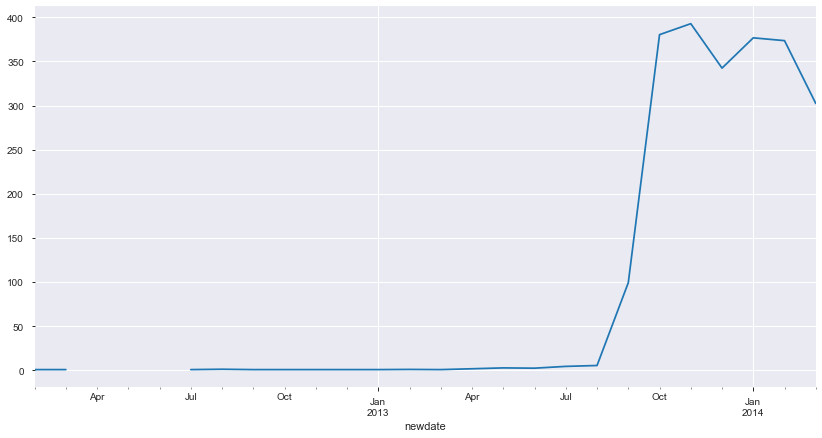

In [70]:
plt.figure(figsize=(14,7))
new_date.date.resample('m').mean().plot()

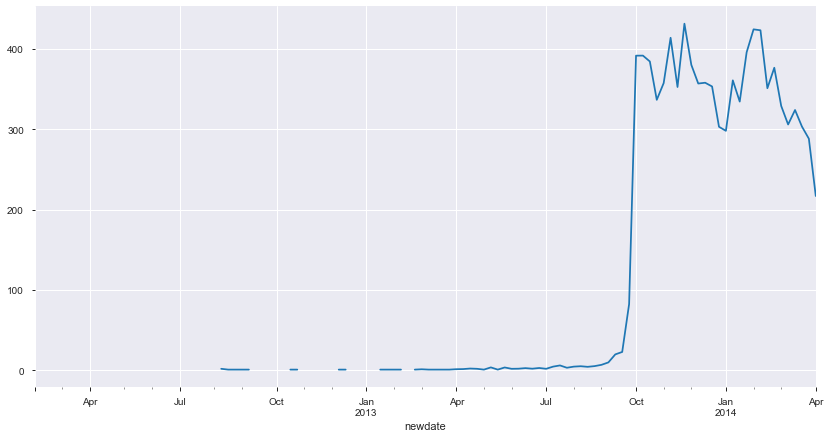

In [71]:
plt.figure(figsize=(14,7))
new_date.date.resample('w').mean().plot()
#new_date.head()

In [72]:
new_datw1=new_date['2013-6-1':'2014-4-1']

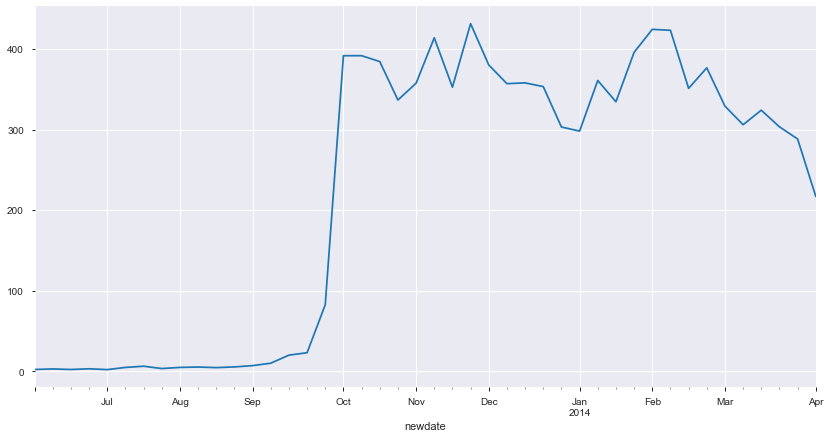

In [73]:
plt.figure(figsize=(14,7))
new_datw1.date.resample('w').mean().plot()

In [74]:
new_datw2=new_date['2012-2-25':'2013-1-1']

In [75]:
new_datw3=new_date['2013-1-1':'2014-1-1']

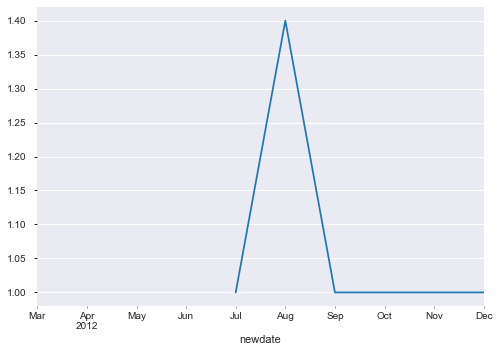

In [76]:

new_datw2.date.resample('m').mean().plot()

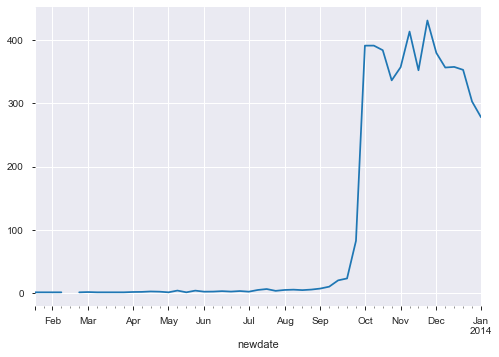

In [77]:
new_datw3.date.resample('w').mean().plot()

In [78]:
ts = new_date.loc[:,['date']]
ts.tail()

,date
newdate,
2014-03-31,217
2014-03-31,217
2014-03-31,217
2014-03-31,217
2014-03-31,217


#### Step 3 - Selecting specific time-period for analysis 

In [79]:
# data with frequency of days

ts2 = ts['2013-9-1':'2014-03-31']

In [80]:
ts2.head()

,date
newdate,
2013-09-02,12
2013-09-02,12
2013-09-02,12
2013-09-02,12
2013-09-02,12


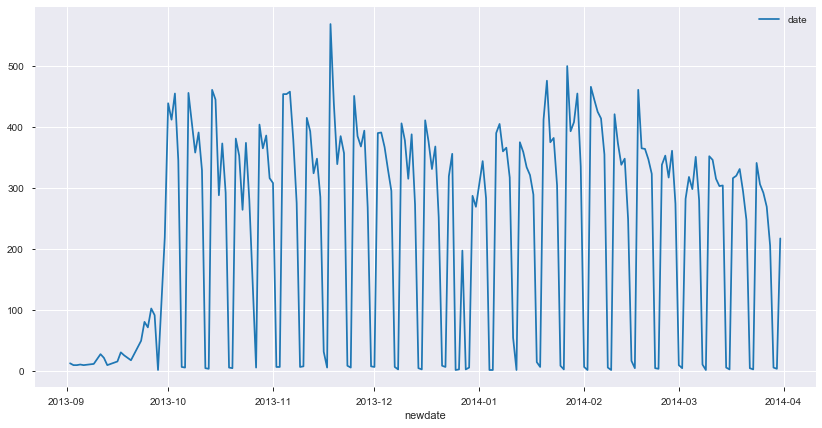

In [82]:
plt.figure(figsize=(14,7))
sns.lineplot(data=ts2)

### Checking the data if it is stationary or not with Results of Dickey-Fuller Test 

In [83]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    
    plt.figure(figsize=(14,7))
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

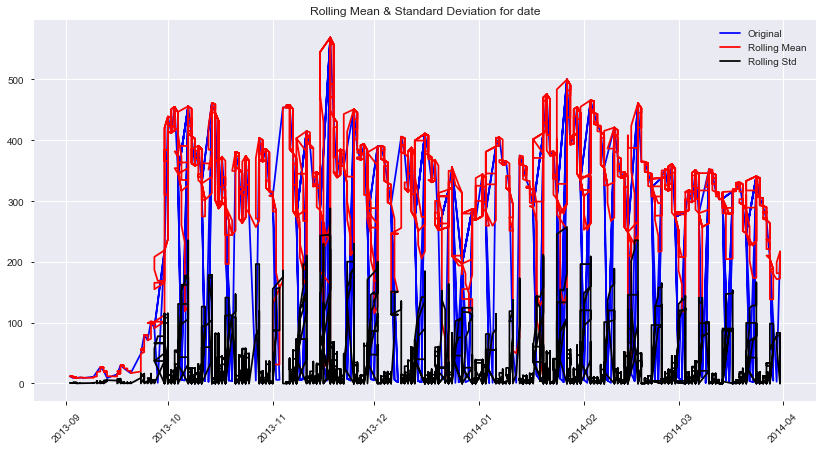

Results of Dickey-Fuller Test:
Test Statistic                -6.839143e+00
p-value                        1.810000e-09
# Lags Used                    5.600000e+01
Number of Observations Used    4.625600e+04
Critical Value (1%)           -3.430491e+00
Critical Value (5%)           -2.861602e+00
Critical Value (10%)          -2.566803e+00
dtype: float64


In [109]:
test_stationarity(ts2,ts='date')

#### Step 4 -Makeing the signal Stationary

In [84]:
def plot_transformed_data(df, ts, ts_transform):
  plt.figure(figsize=(14,7))
  plt.plot(df[ts])
  
  plt.plot(df[ts_transform], color = 'green')
  plt.title('%s and %s time-series graph' %(ts, ts_transform))
  plt.tick_params(axis = 'x', rotation = 45)
  plt.legend([ts, ts_transform])
  plt.show()
  plt.close()
  
  return

In [85]:
ts2['ts_trans'] = ts2.date.apply(lambda x: np.log(x)) - ts2.date.diff()

C:\Users\MANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Ploting the stationary and non stationary data together

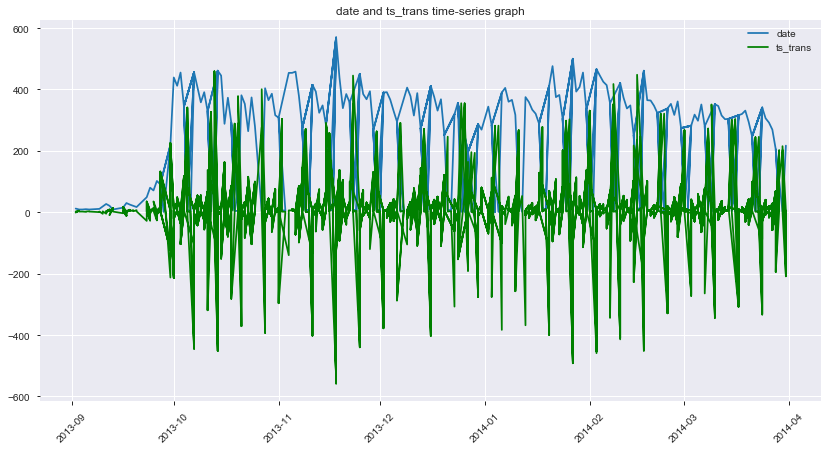

In [112]:
## transforming the data 

plot_transformed_data(ts2,ts='date',ts_transform='ts_trans')

In [113]:
ts2.isnull().sum()


date        0
ts_trans    1
dtype: int64

In [114]:
ts2.fillna(0,inplace=True)

C:\Users\MANGA\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


### Decomposing the data to find  Seasonality, Residual and Trend with original

In [115]:
def plot_decomposition(df, ts, trend, seasonal, residual):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (20, 10), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

C:\Users\MANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\MANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\MANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

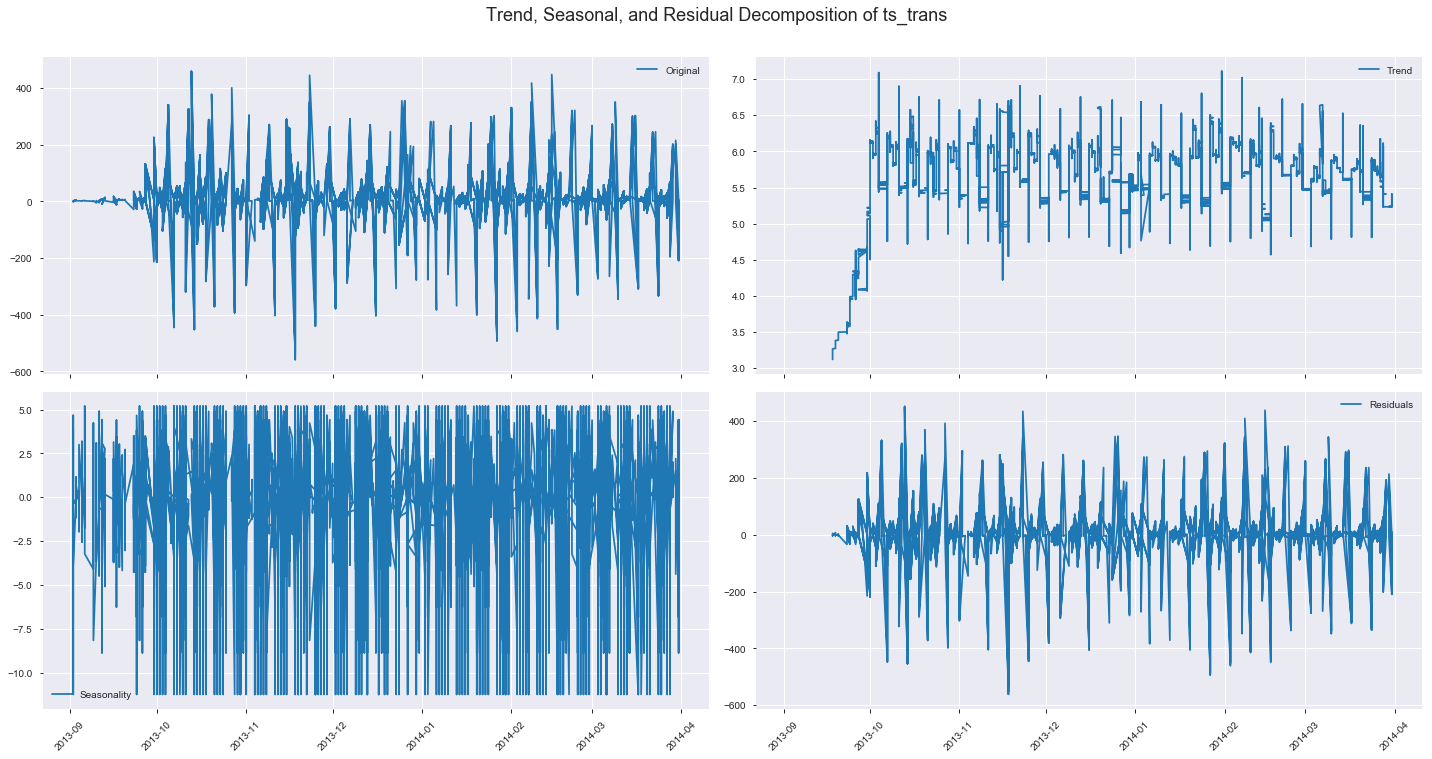

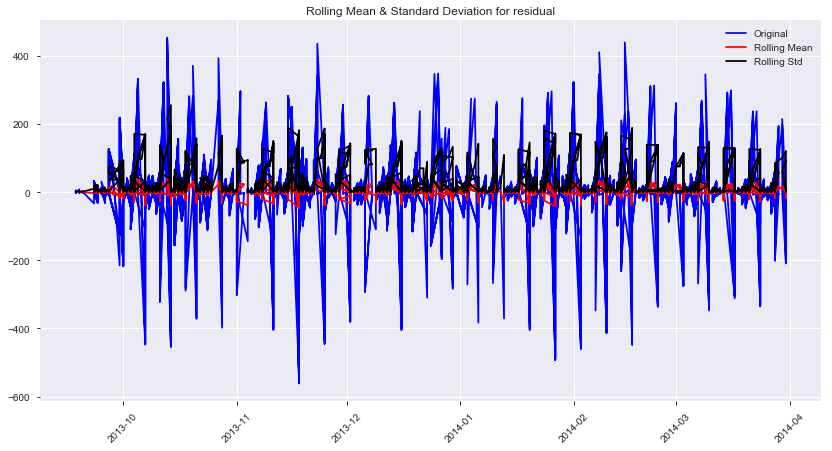

Results of Dickey-Fuller Test:
Test Statistic                   -41.710027
p-value                            0.000000
# Lags Used                       56.000000
Number of Observations Used    45892.000000
Critical Value (1%)               -3.430493
Critical Value (5%)               -2.861603
Critical Value (10%)              -2.566804
dtype: float64


In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts2['ts_trans'], freq = 365)

ts2['trend'] = decomposition.trend
ts2['seasonal'] = decomposition.seasonal
ts2['residual'] = decomposition.resid

plot_decomposition(df = ts2, 
                   ts = 'ts_trans', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = ts2.dropna(), ts = 'residual')

In [117]:
def plot_acf_pacf(df, ts):
 
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

#### Finding the auto correlation and partial auto-correlation

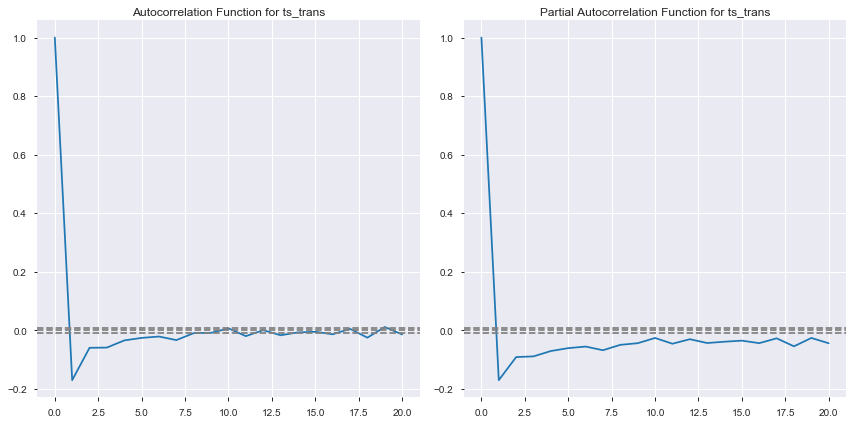

In [118]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(np.array(ts2['ts_trans']), nlags = 20)
lag_pacf = pacf(np.array(ts2['ts_trans']), nlags = 20)

plot_acf_pacf(ts2, ts = 'ts_trans')

In [119]:
def run_arima_model(df, ts, p, d, q):
  """
  Run ARIMA model
  """
  from statsmodels.tsa.arima_model import ARIMA
  model = ARIMA(df[ts], order=(p, d, q))  
  results_ = model.fit(disp=-1)  
  len_results = len(results_.fittedvalues)
  ts_modified = df[ts][-len_results:]
  rss = sum((results_.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))
  
  plt.plot(df[ts])
  plt.plot(results_.fittedvalues, color = 'red')
  plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
  
  plt.show()
  plt.close()
  
  return results_

C:\Users\MANGA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MANGA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\MANGA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = 

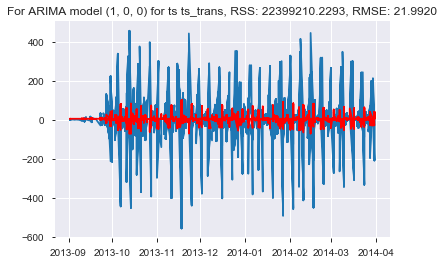

C:\Users\MANGA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


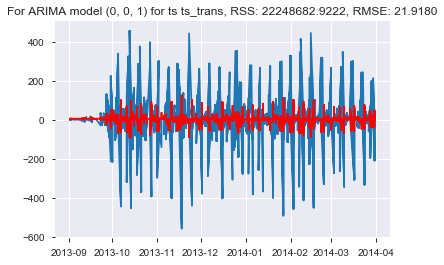

C:\Users\MANGA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


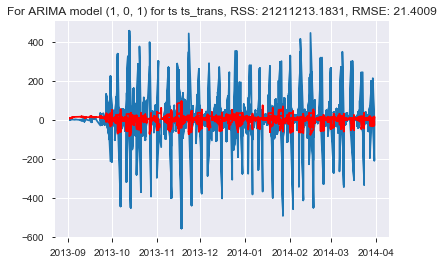

In [120]:
model_AR = run_arima_model(ts2, 
                           ts = 'ts_trans', 
                           p = 1, 
                           d = 0, 
                           q = 0)
model_MA = run_arima_model(ts2, 
                           ts = 'ts_trans', 
                           p = 0, 
                           d = 0, 
                           q = 1)
model_MA = run_arima_model(ts2, 
                           ts = 'ts_trans', 
                           p = 1, 
                           d = 0, 
                           q = 1)

#### Using The Data to predict the timeseries on FB Prohet package

In [86]:
from fbprophet import Prophet
from datetime import datetime

In [87]:
def days_between(d1, d2):
    """Calculate the number of days between two dates.  D1 is start date (inclusive) and d2 is end date (inclusive)"""
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

In [88]:
ts2.head()

,date,ts_trans
newdate,,
2013-09-02,12,NaN
2013-09-02,12,2.484907
2013-09-02,12,2.484907
2013-09-02,12,2.484907
2013-09-02,12,2.484907


In [89]:
ts2.shape

(46313, 2)

In [90]:
ts2['date'] = ts2.index

C:\Users\MANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
#ts2.reset_index(inplace = True)

In [125]:
#model = Prophet()

In [126]:
#ts2.rename(columns={'dat':'ds','ts_trans':'y'},inplace = True)

In [127]:
#model.fit(ts2.loc[:,['ds','y']])

In [128]:
#future_days=model.make_future_dataframe(periods=365)

In [129]:
#future_days=future

In [130]:
#pred = model.predict(future_days)

In [131]:
#pred.shape

In [132]:
#pred.head()

In [133]:
#plt.figure(figsize=(14,7))
#pd.plotting.register_matplotlib_converters()
#model.plot(pred)
#sns.lineplot(x='ds',y='yhat',data=pred)

In [134]:
#plot_transformed_data(pred,ts='yhat')

In [91]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

#### Step 5-Specifing the data For prediction

In [92]:
date_column = 'dt'
metric_column = 'ts'
table = ts2
start_training_date = '2013-09-02'
end_training_date = '2014-03-31'
start_forecasting_date = '2014-04-01'
end_forecasting_date = '2014-8-30'
year_to_estimate = '2014'
future_num_points = days_between(start_forecasting_date, end_forecasting_date)
cap = None # 2e6
growth = 'linear'
n_changepoints = 25 
changepoint_prior_scale = 0.05 
changepoints = None 
holidays_prior_scale = 10 
interval_width = 0.8 
mcmc_samples = 0
holidays = None
daily_seasonality = True

In [93]:
ts2.head()

,date,ts_trans
newdate,,
2013-09-02,2013-09-02,NaN
2013-09-02,2013-09-02,2.484907
2013-09-02,2013-09-02,2.484907
2013-09-02,2013-09-02,2.484907
2013-09-02,2013-09-02,2.484907


In [94]:
ts2.tail()

,date,ts_trans
newdate,,
2014-03-31,2014-03-31,5.379897
2014-03-31,2014-03-31,5.379897
2014-03-31,2014-03-31,5.379897
2014-03-31,2014-03-31,5.379897
2014-03-31,2014-03-31,5.379897


In [95]:
#ts5 = ts2['date','ts_trans']
ts2.reset_index(inplace= True)
ts2.rename(columns = {'date': 'ds', 'ts_trans': 'y'},inplace=True) 

C:\Users\MANGA\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
#df_prophet.head()

In [97]:
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True):
  df1 = df
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)

  m.fit(df1)

  # Create dataframe for predictions
  future = m.make_future_dataframe(periods = future_num_points)
  plt.figure(figsize=(14,7))
  pd.plotting.register_matplotlib_converters()
  
  fcst = m.predict(future)
  m.plot(fcst);
  m.plot_components(fcst)

  return fcst

#### Step 6- Creating the Daily Forcast

<Figure size 1008x504 with 0 Axes>

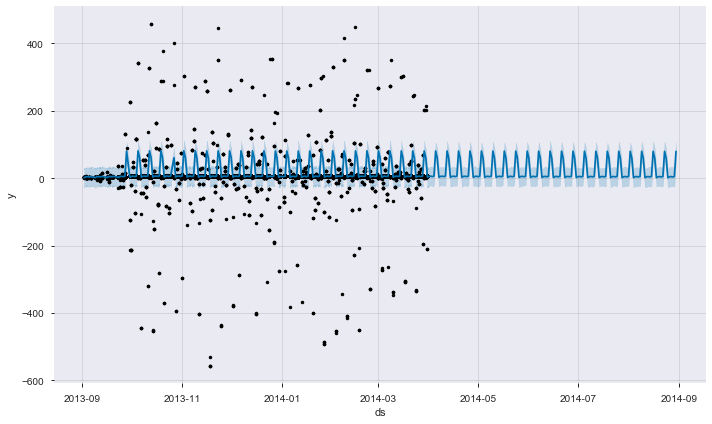

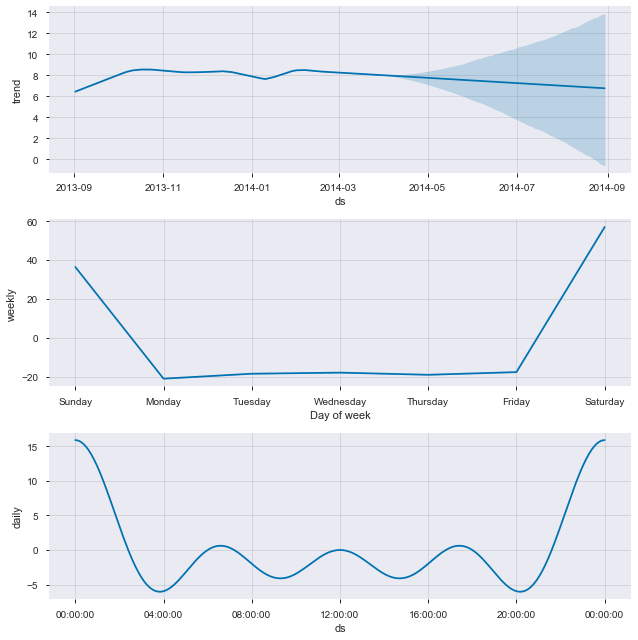

In [98]:

fcst = create_daily_forecast(ts2,
#                             cap,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality)

# There are modifications that i have not done yet bet i will be doing it again  